<a href="https://colab.research.google.com/github/ueche/ml-class/blob/main/projects/Ulysses_Echeverria_Amazon_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AMAZON Project**

For our project we are going to use a dataset of Amazon Musical Instrument Reviews. The main reason I selected this dataset is that it is significantly smaller than the Amazon review datasets for movies, music, and books. This dataset has a bit over 221,000 reviews. The columns in the dataset are

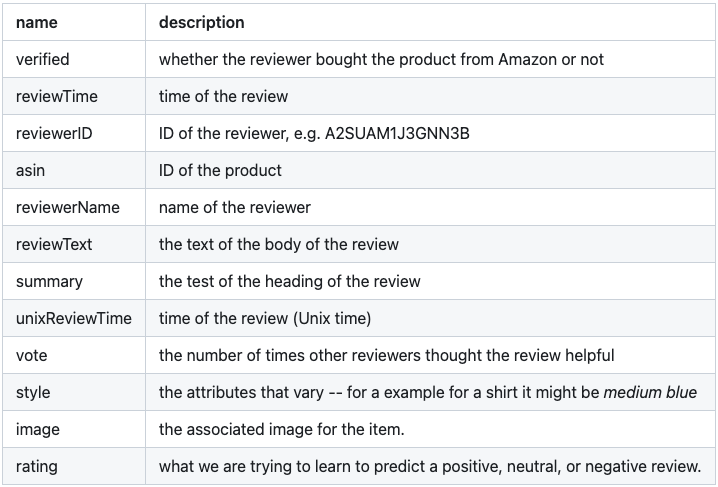

You are to develop a classifier that predicts the rating.

The file with the training data is at http://34.82.108.37/amazonReviewsTrain.csv.zip

Once you are done training and tuning your classify you should run it on the test data.

The file with the test data is http://34.82.108.37/amazonReviewsTest.csv

Your predictions for the test set should be in a text file named amazonReviewsPredictions.txt that is placed in the same github directory as your Jupyter notebook file containing your code and comments.

The format of this predictions file should look like the following:



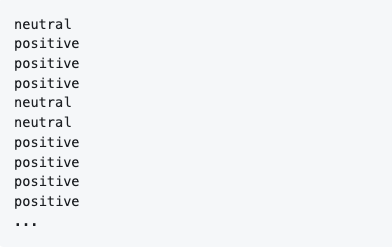



Similar to the Word Embeddings lab with the climate data. Lets see if I can improve the accuracy and performance for thiis dataset using some newfound information.

### **1. Download the data**

In [2]:
import pandas as pd
from pandas import DataFrame

amz_data = pd.read_csv('http://34.82.108.37/amazonReviewsTrain.csv.zip')
amz_data.head()


<ipython-input-2-b539ce2793b9>:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  amz_data = pd.read_csv('http://34.82.108.37/amazonReviewsTrain.csv.zip')


,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,rating
0,True,"05 4, 2017",A2QNLVLQHW6OOC,B00NEZNT74,Jason L.,Have 30 of these in operation great lights,Five Stars,1493856000,NaN,{'Size:': ' 4PC'},NaN,positive
1,True,"12 1, 2014",A32SHV461SUWNQ,B002Q0WTCE,Richard C.,"Good replacement. I prefer my Rovner L5, but ...",Good replacement. I prefer my Rovner L5,1417392000,NaN,NaN,NaN,positive
2,True,"12 23, 2015",A2SKHG5ULPYIMC,B0002GFP9I,BellaLatinaReina-ACP Zero-Nine-Five,My son & band teacher loves it. Really nice. B...,Really Helps With Their Practice Pad,1450828800,NaN,NaN,NaN,positive
3,True,"09 4, 2013",A2MFJ6C67AL015,B003AJVKDO,BOS116,This was a gift for a friend who is a fan of t...,Guitar picks,1378252800,NaN,{'Color:': ' Logo'},NaN,positive
4,True,"08 28, 2015",ACYCDUUE9A3T2,B004XNK7AI,jack edwards,Wish it would attach to my violin a little eas...,... to my violin a little easier but it works ...,1440720000,NaN,{'Color:': ' Black - SN-5'},NaN,positive


In [3]:
amz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221392 entries, 0 to 221391
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   verified        221392 non-null  bool  
 1   reviewTime      221392 non-null  object
 2   reviewerID      221392 non-null  object
 3   asin            221392 non-null  object
 4   reviewerName    221358 non-null  object
 5   reviewText      221344 non-null  object
 6   summary         221344 non-null  object
 7   unixReviewTime  221392 non-null  int64 
 8   vote            33295 non-null   object
 9   style           116012 non-null  object
 10  image           3703 non-null    object
 11  rating          221392 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 18.8+ MB


### **2. Preprocess the Data**
Now that we know what the data looks like, lets perform some preprocessing before we decide to build the model.

Lets drop the unnecessary columns from the data frame and only keep the textReview column and the rating column which will be our label.

In [4]:
# separate the review test data and the sentiment data into separate data frames
amz_reviews = amz_data['reviewText']
amz_labels = amz_data['rating']


In [5]:
amz_reviews

0                Have 30 of these in operation great lights
1         Good replacement.  I prefer my Rovner L5, but ...
2         My son & band teacher loves it. Really nice. B...
3         This was a gift for a friend who is a fan of t...
4         Wish it would attach to my violin a little eas...
                                ...                        
221387    Still hard to beat D'Addario. Hope they keep i...
221388    Ortofon hits the nail right on the head with t...
221389    This is my absolute favorite guitar strap amon...
221390                                                 nice
221391    This polishing cloth is well-made and a great ...
Name: reviewText, Length: 221392, dtype: object

In [6]:
unique_data_types = len(set(type(review) for review in amz_reviews))
print("Number of unique data types in amz_reviews:", unique_data_types)

Number of unique data types in amz_reviews: 2


Upons inspecting the amz_reviews data frame we can see that there are 2 data types that make up the data. We only want the string data type. Lets remove all rows that are not of type string

In [7]:
# Filter out rows with non-string values in the 'reviewText' column
amz_data = amz_data[amz_data['reviewText'].apply(lambda x: isinstance(x, str))]

# Reset the index
amz_data.reset_index(drop=True, inplace=True)

In [8]:
#all non-string values have been removed

amz_data.summary

0                                                Five Stars
1                   Good replacement. I prefer my Rovner L5
2                      Really Helps With Their Practice Pad
3                                              Guitar picks
4         ... to my violin a little easier but it works ...
                                ...                        
221339                                           Five Stars
221340                         Headshell Impovment?  YES!!!
221341                              ecclesiastical / hippie
221342                                           Five Stars
221343                                Great polishing cloth
Name: summary, Length: 221344, dtype: object

In [9]:
# separate the review test data and the sentiment data into separate data frames
amz_reviews = amz_data['reviewText']
amz_labels = amz_data['rating']

amz_labels.unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [10]:
# confirming the data frame only contains string data type
unique_data_types = len(set(type(review) for review in amz_reviews))
print("Number of unique data types in amz_reviews:", unique_data_types)

Number of unique data types in amz_reviews: 1


In [11]:
# encode the label data to reflect the three diffrent sentiment in values 0 to 2
amz_labels = amz_data['rating'].apply(lambda x: {
    'positive': 0,
    'neutral': 1,
    'negative': 2
}.get(x))

In [12]:
amz_labels

0         0
1         0
2         0
3         0
4         0
         ..
221339    0
221340    0
221341    0
221342    0
221343    0
Name: rating, Length: 221344, dtype: int64

In [13]:
amz_reviews

0                Have 30 of these in operation great lights
1         Good replacement.  I prefer my Rovner L5, but ...
2         My son & band teacher loves it. Really nice. B...
3         This was a gift for a friend who is a fan of t...
4         Wish it would attach to my violin a little eas...
                                ...                        
221339    Still hard to beat D'Addario. Hope they keep i...
221340    Ortofon hits the nail right on the head with t...
221341    This is my absolute favorite guitar strap amon...
221342                                                 nice
221343    This polishing cloth is well-made and a great ...
Name: reviewText, Length: 221344, dtype: object

In [14]:

# lets see how many records of each data types are in the amz_reviews data frame
from collections import Counter

data_type_counts = Counter(type(review).__name__ for review in amz_reviews)

print("Unique data types in amz_reviews:")
for data_type, count in data_type_counts.items():
    print(f"{data_type}: {count}")

Unique data types in amz_reviews:
str: 221344


In [15]:
# The tokenizer willonly accept text as imput so we had to drop records with non-text 
# data in amz_reviews
from keras.preprocessing.text import Tokenizer

# Create a Tokenizer object with a vocabulary size of 20000 for creating a library 
# for the tokenizer of the most frequently occurring 20,000 words. 
tokenizer = Tokenizer(num_words=20000)

# Fit the tokenizer on the amz_reviews text. This will build the 20K vocabulary 
# based on the text from the reviews 
tokenizer.fit_on_texts(amz_reviews)

# Convert the amz_reviews to sequences using the tokenizer replacing each word in 
# the text with its corresponding integer index from the tokenizer's vocabulary
data_sequences = tokenizer.texts_to_sequences(amz_reviews)

# list the first sequence in data_sequences which represents the converted text 
# to the first entry in amz_reviews
data_sequences[0]


[18, 534, 9, 25, 13, 2199, 22, 570]

In [16]:
# ensures all sequences have the same length of the 300 .
from keras.utils import pad_sequences

maxlen = 300
data300 = pad_sequences(data_sequences, maxlen=maxlen)
data300[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [17]:
# split the data for training and testing
from sklearn.model_selection import train_test_split
train_amz_reviews, test_amz_reviews, train_amz_labels, test_amz_labels = train_test_split(data300, amz_labels, test_size = 0.2, random_state=42)



Build the model

In [18]:

from keras import layers, models
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

vocabulary_size = 20000
embedding_size = 300
model = models.Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=maxlen))


model.add(layers.Conv1D(filters=128, kernel_size=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.3))

model.add(layers.Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.4))

model.add(layers.Conv1D(filters=32, kernel_size=1, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 300)          6000000   
                                                                 
 conv1d (Conv1D)             (None, 300, 128)          38528     
                                                                 
 batch_normalization (BatchN  (None, 300, 128)         512       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 150, 128)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 150, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 150, 64)           8

In [19]:
# Compile the network
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [20]:
history = model.fit(train_amz_reviews, train_amz_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    validation_steps=50)

Epoch 1/10
4427/4427 [==============================] - 50s 9ms/step - loss: 0.5196 - accuracy: 0.8592 - val_loss: 1.5133 - val_accuracy: 0.5925
Epoch 2/10
4427/4427 [==============================] - 50s 11ms/step - loss: 0.4434 - accuracy: 0.8655 - val_loss: 0.4739 - val_accuracy: 0.8794
Epoch 3/10
4427/4427 [==============================] - 43s 10ms/step - loss: 0.4206 - accuracy: 0.8670 - val_loss: 0.4567 - val_accuracy: 0.8863
Epoch 4/10
4427/4427 [==============================] - 38s 9ms/step - loss: 0.4075 - accuracy: 0.8697 - val_loss: 0.4508 - val_accuracy: 0.8875
Epoch 5/10
4427/4427 [==============================] - 37s 8ms/step - loss: 0.3976 - accuracy: 0.8726 - val_loss: 0.4187 - val_accuracy: 0.8869
Epoch 6/10
4427/4427 [==============================] - 41s 9ms/step - loss: 0.3905 - accuracy: 0.8749 - val_loss: 0.3870 - val_accuracy: 0.8900
Epoch 7/10
4427/4427 [==============================] - 38s 9ms/step - loss: 0.3841 - accuracy: 0.8761 - val_loss: 0.3916 - val_

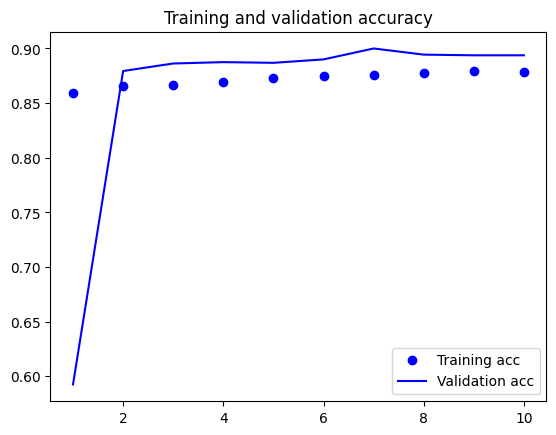

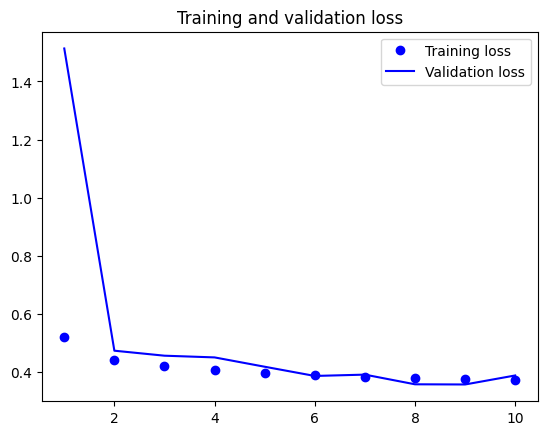

In [23]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
test_loss, test_acc, = model.evaluate(test_amz_reviews, test_amz_labels)
print("Accuracy %f    Loss: %f" % (test_acc, test_loss))

1384/1384 [==============================] - 5s 4ms/step - loss: 0.4020 - accuracy: 0.8792
Accuracy 0.879171    Loss: 0.402046


Now that I have a good model, lets see how it performs with the 

In [26]:
# download the test data
test_data = pd.read_csv('http://34.82.108.37/amazonReviewsTest.csv')

# Preprocess the test_data
test_data = test_data[test_data['reviewText'].apply(lambda x: isinstance(x, str))]
test_data.reset_index(drop=True, inplace=True)


In [27]:
from keras.preprocessing.text import Tokenizer

# Create test_data_sequences
test_amz_reviews = test_data['reviewText']
test_data_sequences = tokenizer.texts_to_sequences(test_amz_reviews)

# Pad the test_data_sequences
maxlen = 300
test_data300 = pad_sequences(test_data_sequences, maxlen=maxlen)

In [29]:
import numpy as np

# Make predictions
predictions = model.predict(test_data300)

# Convert the predictions to their corresponding categorical string
category_mapping = {0: 'positive', 1: 'neutral', 2: 'negative'}
predicted_labels = [category_mapping[np.argmax(prediction)] for prediction in predictions]



313/313 [==============================] - 1s 2ms/step


In [30]:
# Save the results to a file
with open('amazonReviewsPredictions.txt', 'w') as outfile:
    for label in predicted_labels:
        outfile.write(label + '\n')

In [31]:
def test():
  i = 0
  answers = ['negative', 'neutral', 'positive']
  with open('amazonReviewsPredictions.txt', 'r') as outfile:
    lines = outfile.readlines()
    for line in lines:
        if line.strip() not in answers:
          return("invalid entry line %i" % (i))
        i += 1
    if i != 10000:
      return ("incorrect number of lines")
    else:
      return ("file looks ok")
test()

'file looks ok'

The file with the test data is http://34.82.108.37/amazonReviewsTest.csv



Lets look for some resources on how to accomplish this.

https://huggingface.co/docs/transformers/index

http://jalammar.github.io/illustrated-bert/

https://mccormickml.com/2019/07/22/BERT-fine-tuning/


